In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points
import glob
import os
from astropy.coordinates import SkyCoord, frame_transform_graph
from astropy.wcs.utils import (celestial_frame_to_wcs, pixel_to_skycoord, proj_plane_pixel_scales,
                               skycoord_to_pixel, wcs_to_celestial_frame)

#from ..utils import parse_input_data
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
from wcsFunction import findwcs

In [14]:
cd /orange/adamginsburg/w51/gtc/parker/hBand/h_wcsCorrectedImages

/orange/adamginsburg/w51/gtc/parker/hBand/h_wcsCorrectedImages


In [15]:
files = !ls *fits

In [16]:
len(files)

91

In [8]:
test = fits.open(files[19])
test[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                    1 / default scaling factor                         
BZERO   =                32768 / offset data range to that of unsigned short    
DETVER  = 'SCI     '           / 401 Detector used: science or engineering      
NSEC    =                    1 / 402 Number of sequences executed at detector   
NRST    =                   

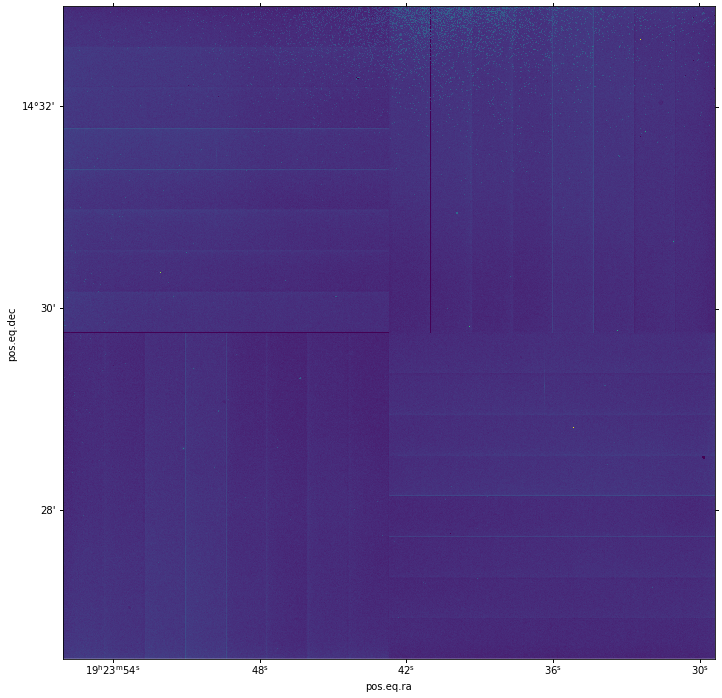

In [13]:
badimage = fits.open(files[179])

pl.figure(figsize=(12,12))
pl.subplot(projection=wcs)
pl.imshow(badimage[0].data)

In [17]:
path = '/orange/adamginsburg/w51/gtc/parker/hBand/h_reprojectedImages'

In [18]:
wcs, shape = find_optimal_celestial_wcs(files)

In [19]:
for filename in files:
    
    filehandle = fits.open(filename)
    filename_nosuffix = os.path.splitext(filename)[0]
    new_filename = f'{path}/{filename_nosuffix}_reprojected.fits'
    
    array, footprint = reproject_interp(filename, wcs, shape)
    
    header = filehandle[0].header
    header.update(wcs.to_header())
    
    hdul = fits.HDUList([fits.PrimaryHDU(data=array, header=header), fits.ImageHDU(footprint)])
    hdul.writeto(new_filename, overwrite=True)

In [20]:
cd /orange/adamginsburg/w51/gtc/parker/hBand/h_reprojectedImages

/orange/adamginsburg/w51/gtc/parker/hBand/h_reprojectedImages


In [21]:
reprojected_files = !ls *fits

In [22]:
len(reprojected_files)

91

In [23]:
file0 = fits.open(reprojected_files[0])
start_data = np.zeros_like(file0[0].data)
ttlcoverage = np.zeros(file0[0].data.shape, dtype='int')
for filename in reprojected_files:
    data = fits.getdata(filename, hdu=0)
    coverage = fits.getdata(filename, ext=1)
    start_data += np.nan_to_num(data) * (coverage == 1)
    ttlcoverage += np.isfinite(data) * (coverage == 1)
avg = start_data / ttlcoverage

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


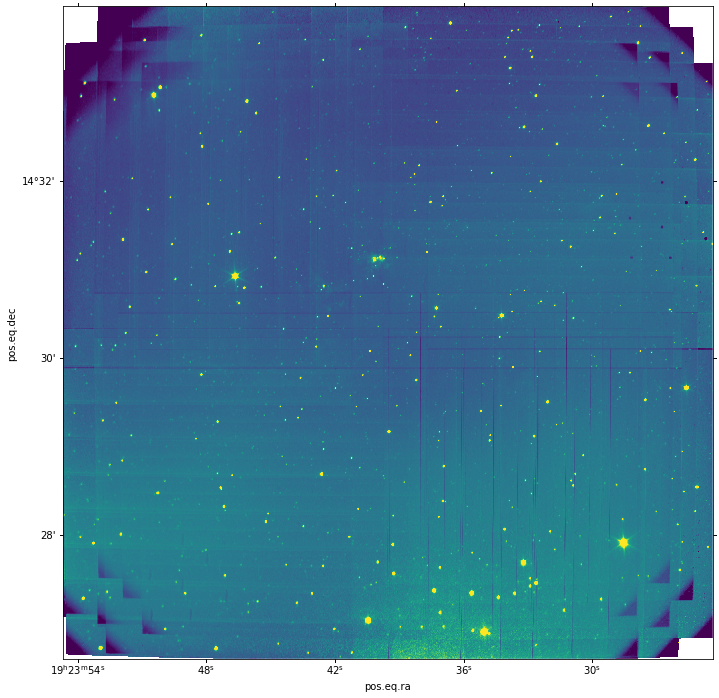

In [36]:
pl.figure(figsize=(12,12))
pl.subplot(projection=wcs)
pl.imshow(avg, vmin = 15000, vmax = 30000)

In [37]:
path = '/orange/adamginsburg/w51/gtc/parker/FinalMosaics'

In [40]:
header = file0[0].header
    
fits.writeto(f'{path}/H_FINAL_MOSAIC.fits', avg, header, overwrite=True)

In [41]:
cd /orange/adamginsburg/w51/gtc/parker/FinalMosaics

/orange/adamginsburg/w51/gtc/parker/FinalMosaics


In [44]:
file = !ls *fits
file[1]

'H_FINAL_MOSAIC.fits'

In [45]:
mosaic = fits.open(file[1])
mosaic

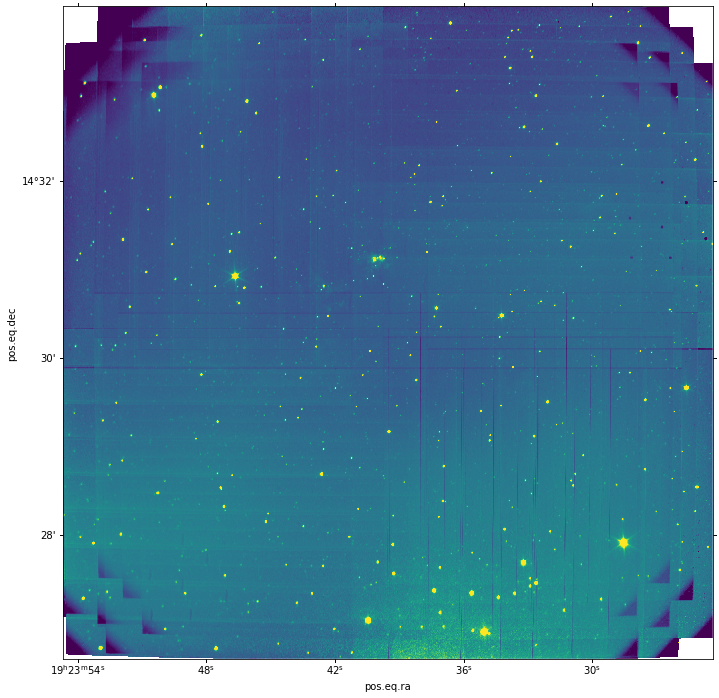

In [46]:
pl.figure(figsize=(12,12))
pl.subplot(projection=wcs)
pl.imshow(mosaic[0].data, vmin = 15000, vmax = 30000)